In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# working with time series

In [2]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1',periods=7,freq="D")

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


In [3]:
google=pd.read_csv("./stock_data/google.csv")
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [4]:
google.set_index("Date",inplace=True)
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [5]:
google.Date=pd.to_datetime(google.Date)
google.info()

AttributeError: 'DataFrame' object has no attribute 'Date'

In [ ]:
data = pd.read_csv('./stock_data/nyse.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data.date=pd.to_datetime(data.date)

# Set date column as index
data.set_index("date",inplace=True)

# Inspect data 
print(data.info())

# Plot data
#El argumento subplots=True en la función data.plot() indica que quieres trazar cada columna de datos en su propio subplot independiente. Esto significa que si tienes múltiples columnas en tu DataFrame data, cada una de ellas se representará en un subplot separado dentro de la misma figura."""
data.plot(subplots=True)
#plt.tight_layout(), estás ajustando automáticamente los subplots para que se ajusten bien en la figura, evitando superposiciones de etiquetas y otros elementos
plt.tight_layout()
plt.show()



### compare the performance for three years of Yahoo stock prices.

In [6]:
yahoo = pd.read_csv('./stock_data/yahoo.csv')
yahoo.date=pd.to_datetime(yahoo.date)
#En el contexto del método set_index(), cuando inplace=True, la modificación se realizará en el DataFrame original yahoo. Es decir, el DataFrame yahoo tendrá su índice cambiado por la columna especificada (date, en este caso) y no se devolverá un nuevo DataFrame.
yahoo.set_index("date",inplace=True)
yahoo.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


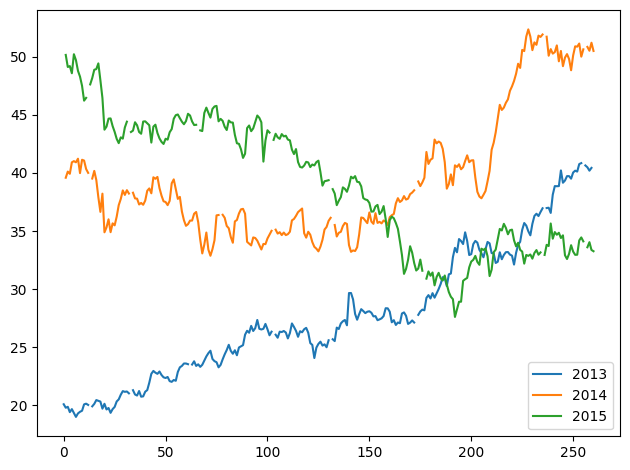

In [7]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ["2013","2014","2015"]:
    price_per_year = yahoo.loc[yahoo.index.year==int(year), ["price"]].reset_index(drop=True)
    price_per_year.rename(columns={"price": year}, inplace=True)#con esta linea cambiamos el nombre de la columna price por el año
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices

prices.plot()
plt.tight_layout()
plt.show()


### Set and change time series frequency
 you'll use data on the daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

You'll set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data.

In [8]:
co = pd.read_csv('./air_quality_data/co_cities.csv',parse_dates=["date"])#parse dates cambia el tipo de dato de dates 
co.set_index("date",inplace=True)
co.asfreq("M").info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2005-01-31 to 2010-12-31
Freq: M
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      68 non-null     float64
 1   Los Angeles  68 non-null     float64
 2   New York     68 non-null     float64
dtypes: float64(3)
memory usage: 2.2 KB


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 123.9 KB
None


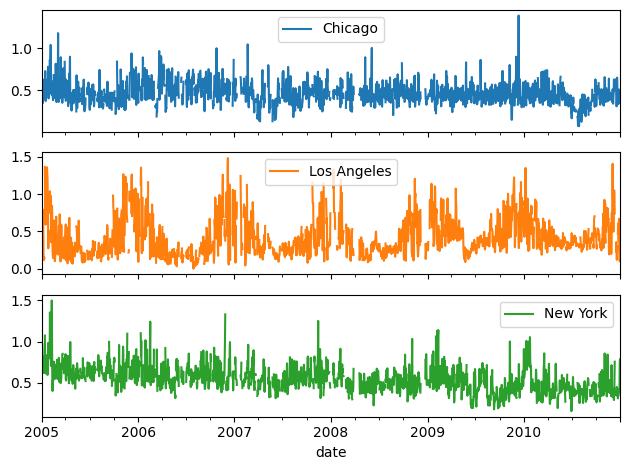

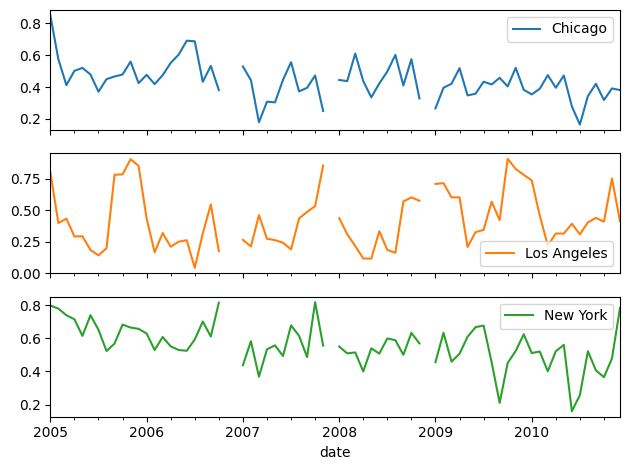

In [9]:
# Inspect data
print(co.info())
# Set the frequency to calendar daily
co = co.asfreq("D")
# Plot the data
co.plot(subplots=True)
plt.tight_layout()
plt.show()
# Set frequency to monthly
co = co.asfreq("M")
# Plot the data
co.plot(subplots=True)
plt.tight_layout()
plt.show()

### lag,changes and returns

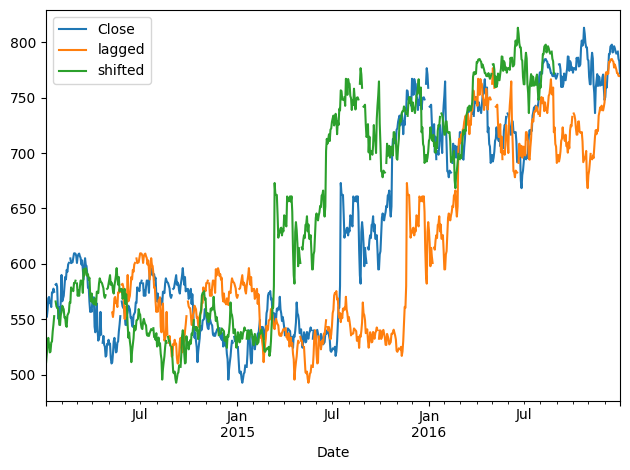

In [10]:
# Import data here
google = pd.read_csv("./stock_data/google.csv",parse_dates=["Date"],index_col="Date")

# Set data frequency to business daily
google = google.asfreq("B")

# Create 'lagged' and 'shifted'
google['lagged'] = google["Close"].shift(periods=90)
google['shifted'] = google["Close"].shift(periods=-90)

# Plot the google price series
google.plot()
plt.tight_layout()
plt.show()


###  calculation to calculate absolute changes from current and shifted prices, and compare the result to the function .diff().

In [11]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo["price"].shift(periods=30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo["price"].sub(yahoo['shifted_30'])

# Get the 30-day price difference
yahoo['diff_30'] = yahoo["price"].diff(periods=30)

# Inspect the last five rows of price
print(yahoo["price"].tail())

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo['change_30'].sub(yahoo['diff_30']).value_counts())


date
2015-12-25      NaN
2015-12-28    33.60
2015-12-29    34.04
2015-12-30    33.37
2015-12-31    33.26
Name: price, dtype: float64
0.0    703
Name: count, dtype: int64


### Plotting multi-period returns
calculate returns for various calendar day periods, and plot the result to compare the different patterns.

C:\Users\kevin\AppData\Local\Temp\ipykernel_548\3742347559.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  google['daily_return'] = google["Close"].pct_change(periods=1).mul(100)
C:\Users\kevin\AppData\Local\Temp\ipykernel_548\3742347559.py:5: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  google['monthly_return'] =  google["Close"].pct_change(periods=30).mul(100)
C:\Users\kevin\AppData\Local\Temp\ipykernel_548\3742347559.py:8: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior

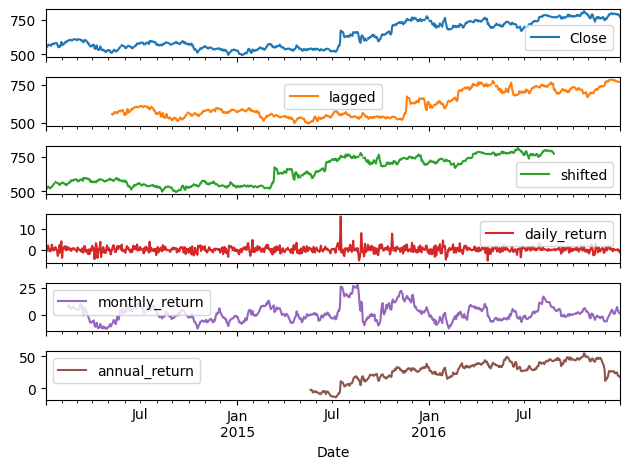

In [12]:
# Create daily_return
google['daily_return'] = google["Close"].pct_change(periods=1).mul(100)

# Create monthly_return
google['monthly_return'] =  google["Close"].pct_change(periods=30).mul(100)

# Create annual_return
google['annual_return'] =  google["Close"].pct_change(periods=360).mul(100)

# Plot the result

google .plot(subplots=True)
plt.tight_layout()
plt.show()

# Basic Time Series Metrics & Resamplinggg

## compare time series growth rates

**Compare the performance of several asset classes**
You have seen in the video how you can easily compare several time series by normalizing their starting points to 100, and plot the result.

To broaden your perspective on financial markets, let's compare four key assets: stocks, bonds, gold, and oil.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


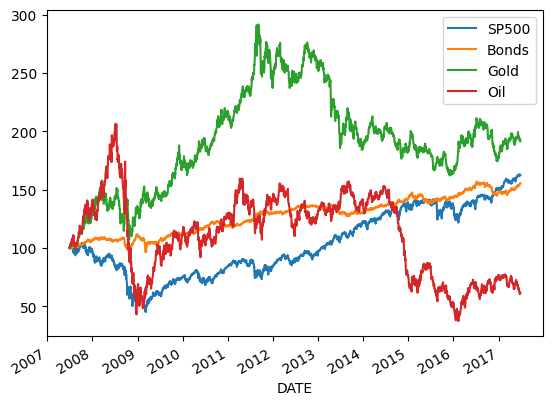

In [3]:
# Import data here
prices = pd.read_csv('./stock_data/asset_classes.csv',parse_dates=["DATE"],index_col="DATE")

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = (prices/first_prices)*100

# Plot normalize
normalized.plot()
plt.show()

**Comparing stock prices with a benchmark**

You also learned in the video how to compare the performance of various stocks against a benchmark. Now you'll learn more about the stock market by comparing the three largest stocks on the NYSE to the Dow Jones Industrial Average, which contains the 30 largest US companies.

The three largest companies on the NYSE are:

Company	Stock Ticker
Johnson & Johnson	JNJ
Exxon Mobil	XOM
JP Morgan Chase	JPM

**Normalizar Datos:**
El objetivo es comparar los precios de las acciones a lo largo del tiempo, por lo que es necesario normalizar los datos. Esto se hace tomando los precios del primer registro (first_prices) y usando estos valores para normalizar el resto de los datos. La normalización se realiza dividiendo cada valor por el primer precio y multiplicando por 100. Esto permite ver el cambio porcentual en relación con el primer precio para cada acción e índice.

In [5]:
# Import stock prices and index here
stocks = pd.read_csv("./stock_data/nyse.csv",parse_dates=["date"],index_col="date")
dow_jones = pd.read_csv("./stock_data/dow_jones.csv",parse_dates=["date"],index_col="date")

In [6]:
stocks.head()

,JNJ,JPM,XOM
date,,,
2010-01-04,64.68,42.85,69.15
2010-01-05,63.93,43.68,69.42
2010-01-06,64.45,43.92,70.02
2010-01-07,63.99,44.79,69.80
2010-01-08,64.21,44.68,69.52


In [7]:
dow_jones.head()

,DJIA
date,
2010-01-04,10583.96
2010-01-05,10572.02
2010-01-06,10573.68
2010-01-07,10606.86
2010-01-08,10618.19


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


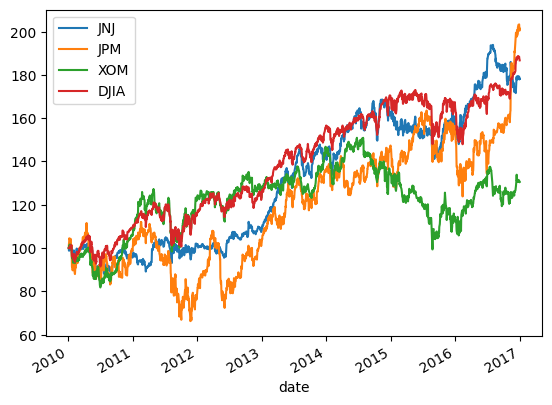

In [8]:
# Concatenate data and inspect result here
data = pd.concat([stocks,dow_jones],axis=1)
print(data.info())

# Normalize and plot your data here

# Select first prices
first_prices = data.iloc[0]


# Create normalized
data.div(first_prices).mul(100).plot()#otra manera directamente de normalizar los datos 

plt.show()

**Plot performance difference vs benchmark index**
In the video, you learned how to calculate and plot the performance difference of a stock in percentage points relative to a benchmark index.

Let's compare the performance of Microsoft (MSFT) and Apple (AAPL) to the S&P 500 over the last 10 years.

In [6]:
# Create tickers
tickers = ["MSFT","AAPL"]

# Import stock data here
stocks = pd.read_csv('./stock_data/msft_aapl.csv',parse_dates=["date"],index_col="date")

# Import index here
sp500 = pd.read_csv('./stock_data/sp500.csv',parse_dates=["date"],index_col="date")


# Concatenate stocks and index here
data = pd.concat([stocks,sp500],axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

* Seleccionar columnas específicas: normalized[tickers] selecciona las columnas de normalized correspondientes a las acciones especificadas en la lista tickers. Esto asume que tickers es una lista de nombres de acciones.
* Normalización: sub es un método de pandas que realiza la resta elemento a elemento. En este caso, se está restando la columna del S&P 500 (normalized['SP500']) de cada una de las columnas seleccionadas (normalized[tickers]). Esto normalmente se hace para comparar el rendimiento de las acciones con el rendimiento del mercado en general.

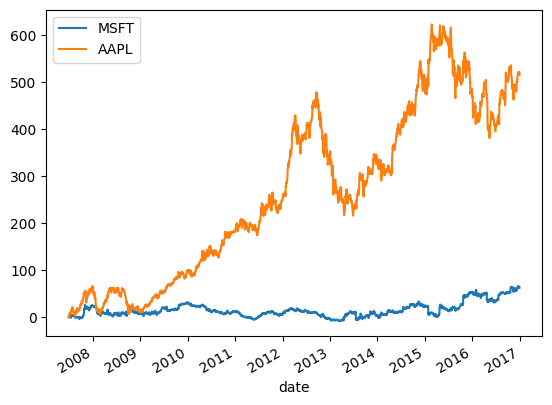

In [7]:
# Subtract the normalized index from the normalized stock prices, and plot the result

normalized[tickers].sub(normalized['SP500'],axis=0).plot()
plt.show()

El gráfico mostraría la diferencia entre el rendimiento de las acciones seleccionadas y el rendimiento del índice S&P 500 a lo largo del tiempo. Aquí hay algunas interpretaciones posibles:
- 
Rendimiento relativo: Si la línea del gráfico está por encima de cero, significa que las acciones seleccionadas están superando al S&P 500 en términos de rendimiento. Por el contrario, si está por debajo de cero, indica que las acciones están bajoperforming en comparación con el índice de referenci
- .
Tendencias a largo plazo: El gráfico puede ayudar a identificar tendencias a largo plazo en el rendimiento relativo de las acciones en comparación con el mercado en general. Por ejemplo, si la línea muestra una tendencia creciente por un período prolongado, podría indicar que estas acciones han estado superando consistentemente al mercad- o.
Volatilidad relativa: Las fluctuaciones en la línea del gráfico pueden indicar la volatilidad relativa de las acciones en comparación con el índice S&P 500. Por ejemplo, si la línea muestra movimientos bruscos hacia arriba y hacia abajo, podría sugerir que las acciones son más volátiles que el mercado en gener- al.
Eventos específicos: Se pueden identificar eventos específicos que afectan el rendimiento relativo de las acciones en comparación con el S&P 500. Por ejemplo, si hay un período en el que la línea cae bruscamente, podría ser el resultado de noticias o eventos que afectan a esas acciones en particular.

**Convert monthly to weekly data**
You have learned in the video how to use .reindex() to conform an existing time series to a DateTimeIndex at a different frequency.

Let's practice this method by creating monthly data and then converting this data to weekly frequency while applying various fill logic options.

In [14]:
# Establecer las fechas de inicio y fin para el rango de fechas
start = '2016-1-1'  # Fecha de inicio del rango
end = '2016-2-29'   # Fecha de fin del rango

# Crear un rango de fechas mensuales usando pd.date_range
# El parámetro 'freq="M"' indica que queremos las fechas finales de cada mes
monthly_dates = pd.date_range(start=start, end=end, freq="M")

# Crear un objeto de tipo pd.Series con datos asociados a las fechas mensuales
# El parámetro 'index' es la lista de fechas donde se asignarán los valores de la serie
data = [1, 2]  # Datos para cada fecha en el índice
monthly = pd.Series(data, index=monthly_dates)  # Crear la serie con los datos y el índice

# Imprimir la serie mensual creada
print(monthly)  # Muestra la serie, se esperaría ver valores 1 y 2 en fechas finales de enero y febrero de 2016

# Crear un rango de fechas semanales usando pd.date_range
# El parámetro 'freq="W"' indica que queremos los días de cada semana (generalmente los domingos)
weekly_dates = pd.date_range(start=start, end=end, freq="W")

# Imprimir la serie mensual después de reindexarla usando las fechas semanales
# Dado que las fechas de las series son diferentes, se espera que haya valores NaN para las nuevas fechas
print(monthly.reindex(weekly_dates))  # Muestra la serie mensual con el índice cambiado a fechas semanales

# Rellenar valores faltantes (NaN) usando el método "backfill"
# "backfill" toma el siguiente valor conocido y lo usa para rellenar valores vacíos
print(monthly.reindex(weekly_dates, method="bfill"))  # Relleno hacia atrás para los valores faltantes en la serie reindexada

# Rellenar valores faltantes (NaN) usando el método "forward fill"
# "forward fill" toma el último valor conocido y lo usa para rellenar valores vacíos
print(monthly.reindex(weekly_dates, method="ffill"))  # Relleno hacia adelante para los valores faltantes en la serie reindexada


2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


**Create weekly from monthly unemployment data**
The civilian US unemployment rate is reported monthly. You may need more frequent data, but that's no problem because you just learned how to upsample a time series.

You'll work with the time series data for the last 20 years, and apply a few options to fill in missing values before plotting the weekly series.

In [23]:
# Import data here
data = pd.read_csv('./stock_data/unrate_2000.csv',parse_dates=["date"],index_col="date")

In [24]:
data.head()

,UNRATE
date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


            UNRATE
date              
2000-01-02     NaN
2000-01-09     NaN
2000-01-16     NaN
2000-01-23     NaN
2000-01-30     NaN
            UNRATE
date              
2000-01-02     4.1
2000-01-09     4.1
2000-01-16     4.1
2000-01-23     4.1
2000-01-30     4.1
            UNRATE
date              
2000-01-02     4.0
2000-01-09     4.0
2000-01-16     4.0
2000-01-23     4.0
2000-01-30     4.0


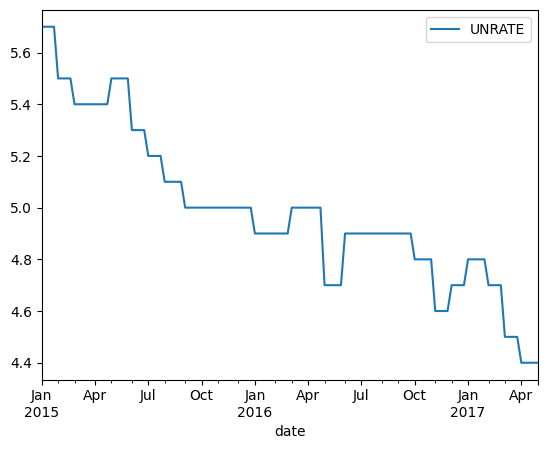

In [25]:
# Show first five rows of weekly series
print(data.asfreq("W").head())

# Show first five rows of weekly series with bfill option
print(data.asfreq("W",method="bfill").head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq("W",method="ffill")
print(weekly_ffill.head())

# Plot weekly_fill starting 2015 here 
weekly_ffill["2015":].plot()
plt.show()

**Use interpolation to create weekly employment data**

You have recently used the civilian US unemployment rate, and converted it from monthly to weekly frequency using simple forward or backfill methods.

Compare your previous approach to the new .interpolate() method that you learned about in this video.

In [59]:
# Import data here
montly = pd.read_csv('./stock_data/unrate.csv',parse_dates=["DATE"],index_col="DATE")
print(type(montly))
montly.head()

<class 'pandas.core.frame.DataFrame'>


,UNRATE
DATE,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  85 non-null     float64
dtypes: float64(1)
memory usage: 3.4 KB
None
            UNRATE  ffill  interpolated
2010-01-03     NaN    NaN           NaN
2010-01-10     NaN    NaN           NaN
2010-01-17     NaN    NaN           NaN
2010-01-24     NaN    NaN           NaN
2010-01-31     NaN    NaN           NaN
...            ...    ...           ...
2016-12-04     NaN    4.7      4.788571
2016-12-11     NaN    4.7      4.791429
2016-12-18     NaN    4.7      4.794286
2016-12-25     NaN    4.7      4.797143
2017-01-01     4.8    4.8      4.800000

[366 rows x 3 columns]


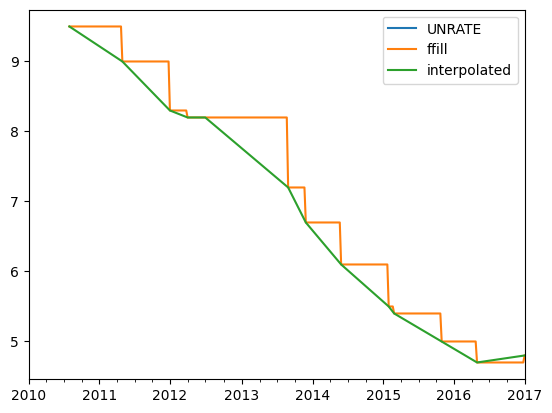

In [67]:
# Inspeccionar el DataFrame 'montly' para obtener información sobre su estructura y contenido
print(montly.info())  # Proporciona detalles sobre el número de filas, columnas, tipo de datos, y memoria utilizada

# Crear un rango de fechas semanales desde el inicio hasta el final del índice del DataFrame 'montly'
# 'freq="W"' indica que el rango tendrá fechas de cada semana
weekly_dates = pd.date_range(start=montly.index.min(), end=montly.index.max(), freq="W")

# Reindexar el DataFrame 'montly' para convertirlo a fechas semanales
# Esto crea nuevos periodos (filas) según el nuevo índice, y puede introducir valores 'NaN' en fechas no originales
weekly = montly.reindex(weekly_dates)

# Crear una columna para el relleno hacia adelante ('ffill') y otra para la interpolación ('interpolated')
# 'ffill()' rellena valores faltantes usando el último valor conocido (forward fill)
# 'interpolate()' utiliza interpolación para calcular valores intermedios (por defecto, es interpolación lineal)
weekly['ffill'] = weekly['UNRATE'].ffill()  # Relleno hacia adelante para valores 'NaN'
weekly['interpolated'] = weekly['UNRATE'].interpolate()  # Interpolación para valores 'NaN'

# Mostrar el contenido del DataFrame 'weekly' para verificar las nuevas columnas
print(weekly)

# Graficar las series con las nuevas columnas
# 'plot()' genera un gráfico para visualizar los datos
weekly.plot()  # Grafica todas las columnas del DataFrame 'weekly'
plt.show()  # Muestra el gráfico en la salida visual

**Interpolate debt/GDP and compare to unemployment**


Since you have learned how to interpolate time series, you can now apply this new skill to the quarterly debt/GDP series, and compare the result to the monthly unemployment rate.

In [70]:
# Import & inspect data here
data = pd.read_csv('./stock_data/debt_unemployment.csv',parse_dates=["date"],index_col="date")
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      29 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


,Debt/GDP,Unemployment
date,,
2010-01-01,87.00386,9.8
2010-02-01,NaN,9.8
2010-03-01,NaN,9.9
2010-04-01,88.67047,9.9
2010-05-01,NaN,9.6


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      89 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


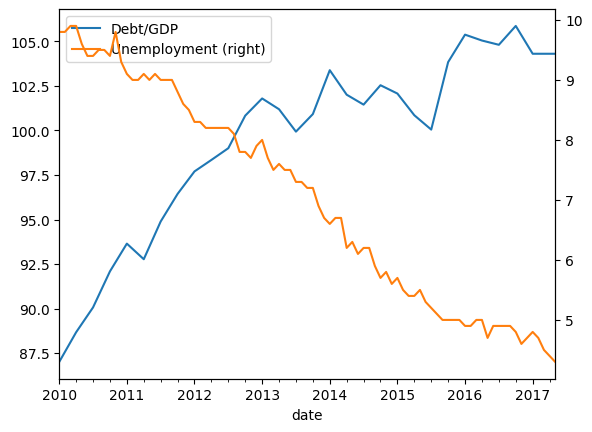

In [72]:
# Interpolar valores faltantes en el DataFrame
# 'interpolate()' rellena los valores 'NaN' usando un método (por defecto, interpolación lineal)
interpolated = data.interpolate()

# Inspeccionar la información del DataFrame interpolado para ver si se rellenaron los valores faltantes
print(interpolated.info())  # Verificar la estructura y si todavía hay valores 'NaN'

# Graficar el DataFrame interpolado
# 'secondary_y="Unemployment"' permite mostrar una segunda escala de eje Y para la columna "Unemployment"
#La opción secondary_y='Unemployment' indica que queremos tener una segunda escala vertical (eje Y) para la columna llamada "Unemployment". Esto es útil cuando tenemos dos conjuntos de datos con diferentes escalas o unidades. 
#Por ejemplo, si un conjunto de datos está en miles y otro en porcentajes, necesitarás dos ejes Y para que ambos conjuntos sean visibles y comparables en el mismo gráfico.
interpolated.plot(secondary_y='Unemployment')  # Graficar las columnas del DataFrame interpolado
plt.show()  # Mostrar el gráfico para visualizar los datos

**Compare weekly, monthly and annual ozone trends for NYC & LA**

You have seen in the video how to downsample and aggregate time series on air quality.

First, you'll apply this new skill to ozone data for both NYC and LA since 2000 to compare the air quality trend at weekly, monthly and annual frequencies and explore how different resampling periods impact the visualization.

In [75]:
# Import and inspect data here
ozone_nyc= pd.read_csv('./air_quality_data/ozone_nyc.csv',parse_dates=["date"],index_col="date")
ozone_la = pd.read_csv('./air_quality_data/ozone_nyla.csv',parse_dates=["date"],index_col="date")
ozone=pd.concat([ozone_nyc,ozone_la],axis=1)
print(ozone.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ozone        6167 non-null   float64
 1   Los Angeles  5488 non-null   float64
 2   New York     6167 non-null   float64
dtypes: float64(3)
memory usage: 196.6 KB
None


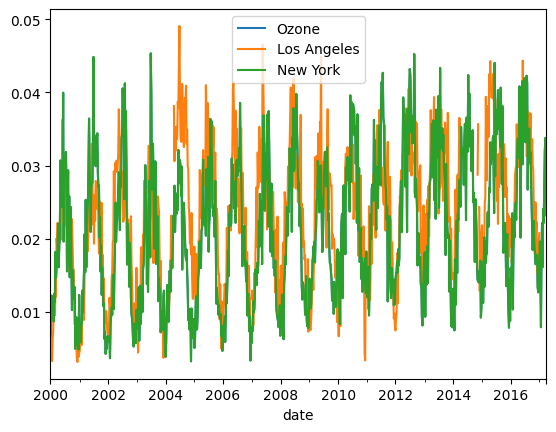

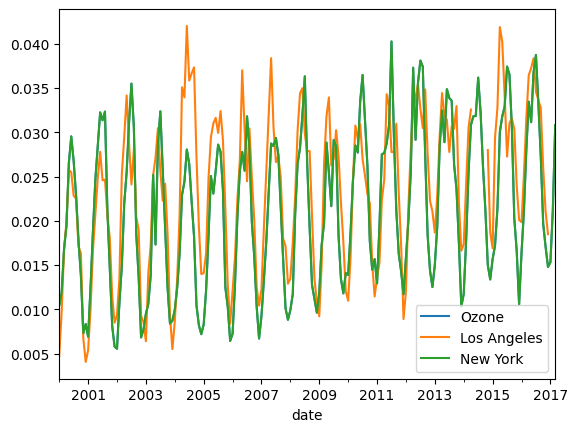

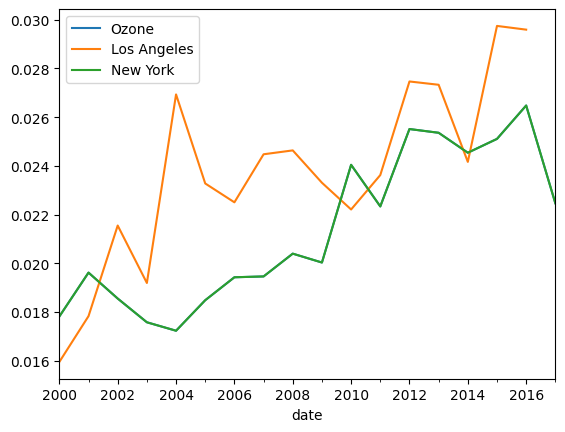

In [76]:
# Calculate and plot the weekly average ozone trend
ozone.resample("W").mean().plot()
plt.show()

# Calculate and plot the monthly average ozone trend
ozone.resample("M").mean().plot()
plt.show()

# Calculate and plot the annual average ozone trend
ozone.resample("A").mean().plot()
plt.show()


**Compare monthly average stock prices for Facebook and Google**

Now, you'll apply your new resampling skills to daily stock price series for Facebook and Google for the 2015-2016 period to compare the trend of the monthly averages.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      504 non-null    float64
 1   GOOG    504 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB
None


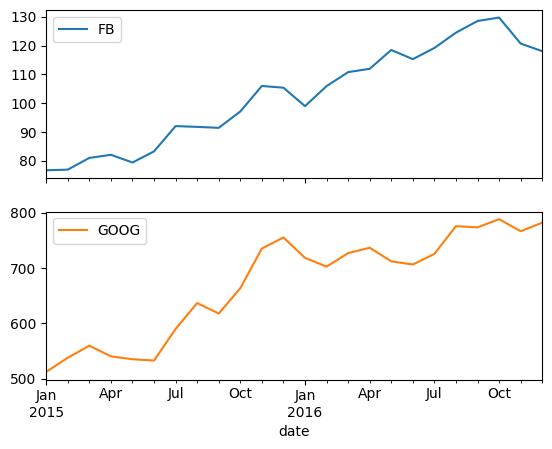

In [78]:
# Import and inspect data here
stocks = pd.read_csv('./stock_data/goog_fb.csv',parse_dates=["date"],index_col="date")
print(stocks.info())

# Calculate and plot the monthly averages
monthly_average = stocks.resample("M").mean()

# Crear un gráfico con subplots, utilizando subplots=True para crear gráficos independientes para cada columna
monthly_average.plot(subplots=True)  # Argumento subplots=True para tener gráficos separados para cada serie

# Mostrar el gráfico
plt.show()  # Renderizar y mostrar el gráfico

**Compare quarterly GDP growth rate and stock returns**

With your new skill to downsample and aggregate time series, you can compare higher-frequency stock price series to lower-frequency economic time series.

As a first example, let's compare the quarterly GDP growth rate to the quarterly rate of return on the (resampled) Dow Jones Industrial index of 30 large US stocks.

GDP growth is reported at the beginning of each quarter for the previous quarter. To calculate matching stock returns, you'll resample the stock index to quarter start frequency using the alias 'QS', and aggregating using the .first() observations.

In [79]:
# Importar datos de crecimiento del PIB desde un archivo CSV
# 'parse_dates' convierte la columna "date" a un formato de fecha
# 'index_col="date"' usa la columna "date" como el índice del DataFrame
gdp_growth = pd.read_csv('./stock_data/gdp_growth.csv', parse_dates=["date"], index_col="date")

# Inspeccionar el DataFrame para obtener información sobre sus columnas, tipo de datos y valores no nulos
print(gdp_growth.info())  # Muestra detalles como número de columnas y tipos de datos

# Importar datos del índice Dow Jones Industrial Average (DJIA) desde un archivo CSV
djia = pd.read_csv('./stock_data/djia.csv', parse_dates=["date"], index_col="date")  # Configurar "date" como el índice

# Inspeccionar el DataFrame DJIA
print(djia.info())  # Información sobre el DataFrame DJIA, similar a lo que hicimos con 'gdp_growth'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   djia    2519 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB
None


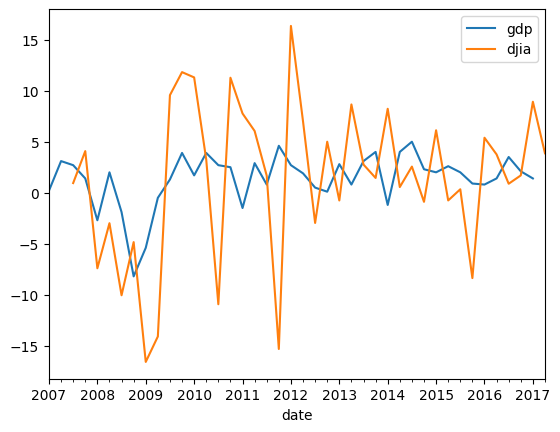

In [80]:
# Calcular los retornos trimestrales del DJIA
# 'resample("QS")' ajusta la frecuencia a trimestres, tomando el primer valor de cada trimestre
djia_quarterly = djia.resample("QS").first()  # Obtener el primer valor de cada trimestre

# Calcular el porcentaje de cambio respecto al trimestre anterior y multiplicar por 100 para obtener el porcentaje
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Concatenar los datos de crecimiento del PIB y los retornos trimestrales del DJIA
# 'axis=1' significa que estamos uniendo a lo largo de las columnas (horizontalmente)
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)

# Renombrar las columnas para identificar claramente las dos series de datos
data.columns = ['gdp', 'djia']  # Asignar nombres a las columnas

# Graficar las dos series de datos para ver su relación
data.plot()  # Generar el gráfico con ambas series

# Mostrar el gráfico
plt.show()  # Renderizar y mostrar el gráfico

**Visualize monthly mean, median and standard deviation of S&P500 returns**

You have also learned how to calculate several aggregate statistics from upsampled data.

Let's use this to explore how the monthly mean, median and standard deviation of daily S&P500 returns have trended over the last 10 years.

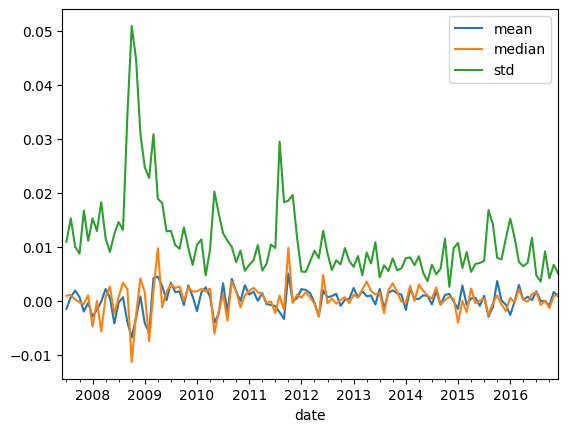

In [81]:
# Import data here
sp500 = pd.read_csv('./stock_data/sp500.csv',parse_dates=["date"],index_col="date")

# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()

# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean','median','std'])

# Plot stats here

stats.plot()
plt.show()

# Window Functions: Rolling & Expanding Metrics # 

**Rolling average air quality since 2010 for new york city**

The last video was about rolling window functions. To practice this new tool, you'll start with air quality trends for New York City since 2010. In particular, you'll be using the daily Ozone concentration levels provided by the Environmental Protection Agency to calculate & plot the 90 and 360 day rolling average.

In [2]:
# Import and inspect ozone data here
data = pd.read_csv('./air_quality_data/ozone_nyc.csv',parse_dates=["date"],index_col="date")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None


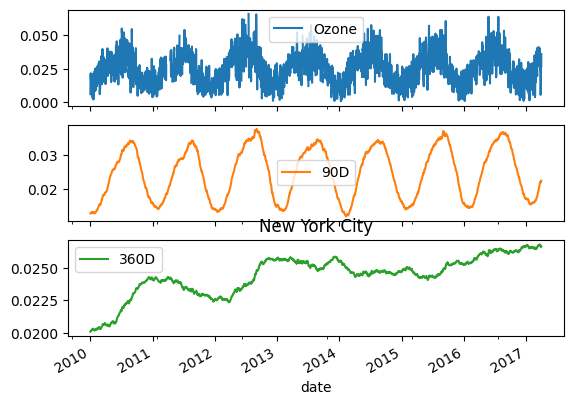

In [3]:

# Calcula la media móvil de 90 días para la columna "Ozone"
# Esto suaviza las fluctuaciones diarias para ver tendencias a corto plazo
data['90D'] = data['Ozone'].rolling("90D").mean()

# Calcula la media móvil de 360 días para la columna "Ozone"
# Esto proporciona una perspectiva más amplia para observar tendencias a largo plazo
data['360D'] = data['Ozone'].rolling("360D").mean()

# Filtra el DataFrame para obtener solo datos a partir de 2010
# Luego, genera gráficos para visualizar las columnas separadas (subplots=True)
data["2010":].plot(subplots=True)

# Añade un título al gráfico para indicar que los datos corresponden a Nueva York
plt.title('New York City')

# Muestra el gráfico generado
plt.show()

**Rolling 360-day median & std. deviation for nyc ozone data since 2000**

The last video also showed you how to calculate several rolling statistics using the .agg() method, similar to .groupby().

Let's take a closer look at the air quality history of NYC using the Ozone data you have seen before. The daily data are very volatile, so using a longer term rolling average can help reveal a longer term trend.

You'll be using a 360 day rolling window, and .agg() to calculate the rolling mean and standard deviation for the daily average ozone values since 2000.

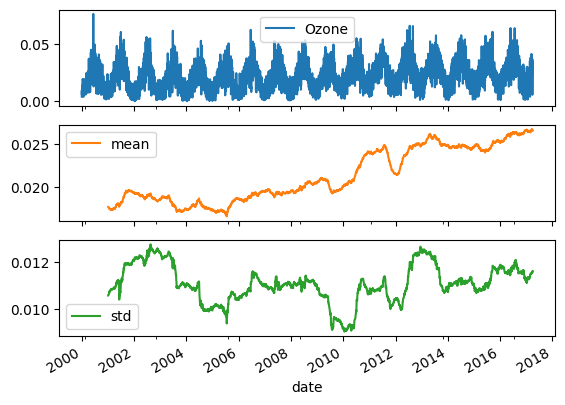

In [5]:
# Import and inspect ozone data here
data = pd.read_csv('./air_quality_data/ozone_nyc.csv',parse_dates=["date"],index_col="date").dropna()

# Calculate the rolling mean and std here
rolling_stats = data['Ozone'].rolling(360).agg(["mean","std"])

# Join rolling_stats with ozone data
stats = data.join(rolling_stats)

# Plot stats

stats.plot(subplots=True)

plt.show()

**Rolling quantiles for daily air quality in nyc**

You learned in the last video how to calculate rolling quantiles to describe changes in the dispersion of a time series over time in a way that is less sensitive to outliers than using the mean and standard deviation.

Let's calculate rolling quantiles - at 10%, 50% (median) and 90% - of the distribution of daily average ozone concentration in NYC using a 360-day rolling window.

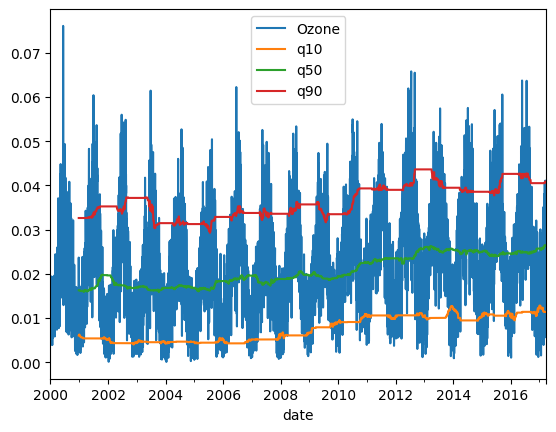

In [7]:
# Crea una ventana de rolling para cálculos que utilizan periodos móviles
# El tamaño de la ventana es de 360 días
rolling = data['Ozone'].rolling(360)

# Calcula el percentil 10, 50 y 90 de la ventana móvil de 360 días
# Estos percentiles indican la distribución del ozono en un periodo móvil de un año
data['q10'] = rolling.quantile(0.1)  # Percentil 10: el valor por debajo del cual cae el 10% de los datos
data['q50'] = rolling.quantile(0.5)  # Percentil 50: el valor medio de la distribución (mediana)
data['q90'] = rolling.quantile(0.9)  # Percentil 90: el valor por debajo del cual cae el 90% de los datos

# Dibuja un gráfico para visualizar las columnas del DataFrame
# El gráfico mostrará la serie temporal con las líneas para los percentiles 10, 50 y 90
data.plot()

# Muestra el gráfico en pantalla
plt.show()



# Building a value-weighted index